#Importing required libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats


#Importing the dataset

In [52]:
data = pd.read_csv('sales_data.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


#Information abou the data

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#Checking Null vales

In [54]:
data.isnull().sum().sum()

11

#Dropping missing values

In [55]:
data = data.dropna()

#Visulisation of sales in different regions

<ipython-input-56-af94684748ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x="Region",y="Sales",palette="Blues_d")


<Axes: xlabel='Region', ylabel='Sales'>

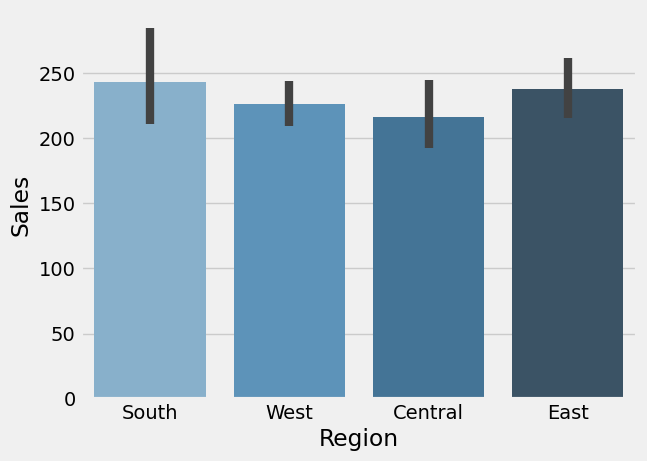

In [56]:
sns.barplot(data, x="Region",y="Sales",palette="Blues_d")

The data is displayed on a bar graph using Seaborn's barplot method. It illustrates 'Sales' info which are labeled by 'Region' and using 'Blues_d' as the color palette. This provides a clear representation of sales distribution across different regions.

#Different shipping mode

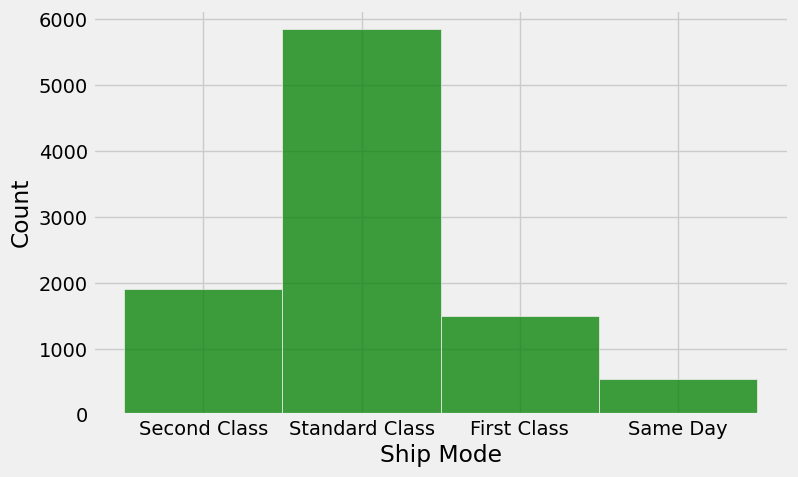

In [57]:
plt.figure(figsize=(8,5))

sns.histplot(x='Ship Mode', data =data, color='green')

plt.show()

#Box plot of sales for different categories

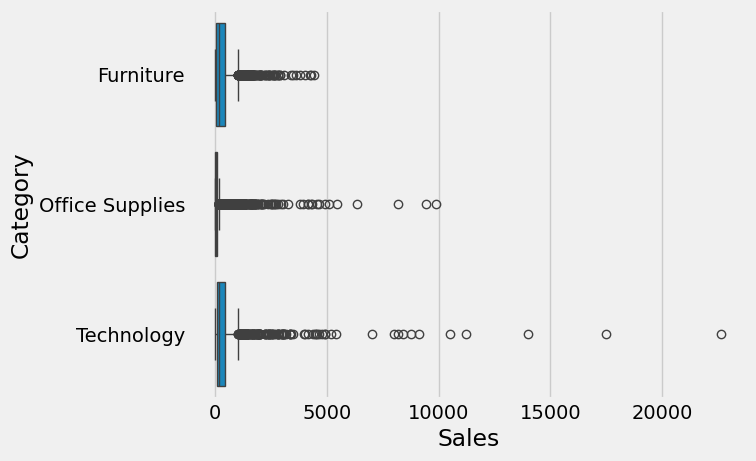

In [58]:
sns.boxplot(x=data['Sales'],y=data["Category"])
plt.show()

This code establishes a Seaborn box plot comprising a Seaborn boxplot function. Sales is the distribution of the indicator between the class of ‘Category’, from the dataset. Each category's sales data is visualized by the box and you get as a result a hold on the spread that the category is having as well as central tendency of sales within each category.


#List of top customers

In [59]:
Top_customers = data.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)
Top_customers = Top_customers[["Sales"]].round(2)
Top_customers.reset_index(inplace=True)
Top_customers

<ipython-input-59-4b81db01dbb8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_customers = data.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20)


,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


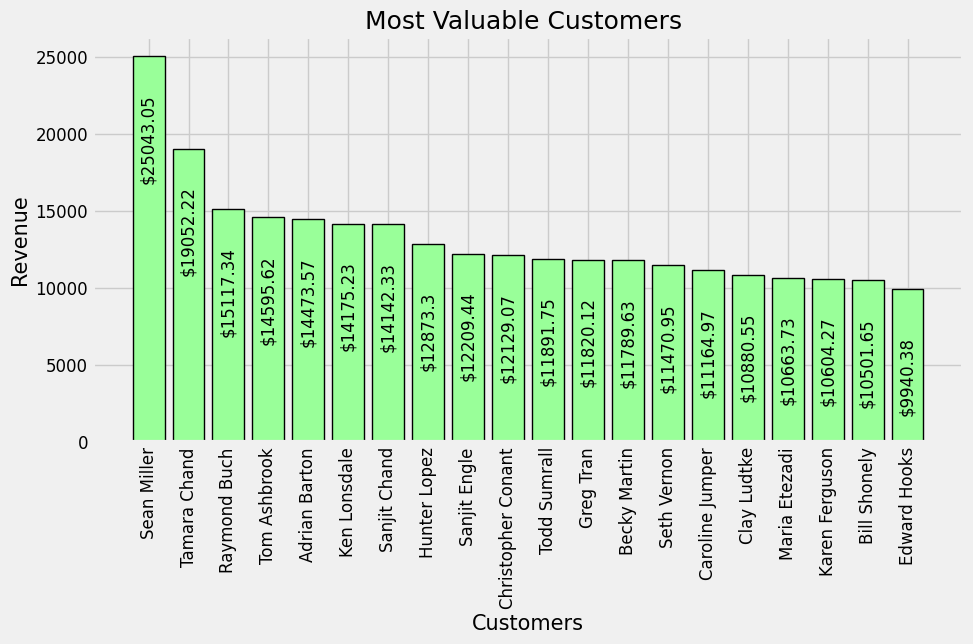

In [60]:
plt.figure(figsize = (10,5))
plt.title("Most Valuable Customers ", fontsize=18)
plt.bar(Top_customers["Customer Name"], Top_customers["Sales"],color= '#99ff99',edgecolor="k", linewidth = 1)
plt.xlabel("Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_customers["Sales"].items():
    plt.text(k,v-8000,'$'+ str(v), fontsize=12,rotation=90,color='k', horizontalalignment='center')

This piece of code designs a chart with a horizontal segment for showing the highest sales revenue of each customers. Firstly, the analysis involves determining the figure size and title. Each sellers' bar is made up of the sales by each customer: customer names being the x-axis values while revenue is the y-axis. The bars are green with black beauty for the purpose of marking it from other filled bars. The labels are adjusted by a rotation for easy readability. Also every bar is tagged with the amount of revenue expressed through the top line. This edition is done by sequentially going through every set of purchases of the top customers and the "plot" text by adding text annotations. The code is thus written in a manner that everyone understands how their sales performance influences top customer base, making analysis much faster and effective.


#List of top products

In [61]:
Top_Product = data.groupby(["Product Name"]).count().sort_values("Sales", ascending=False).head(20)
Top_Product = Top_Product[["Sales"]].round(2)
Top_Product.reset_index(inplace=True)
Top_Product

,Product Name,Sales
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staple remover,18
5,Staples in misc. colors,18
6,Storex Dura Pro Binders,17
7,KI Adjustable-Height Table,17
8,Staple-based wall hangings,16
9,Logitech 910-002974 M325 Wireless Mouse for We...,15


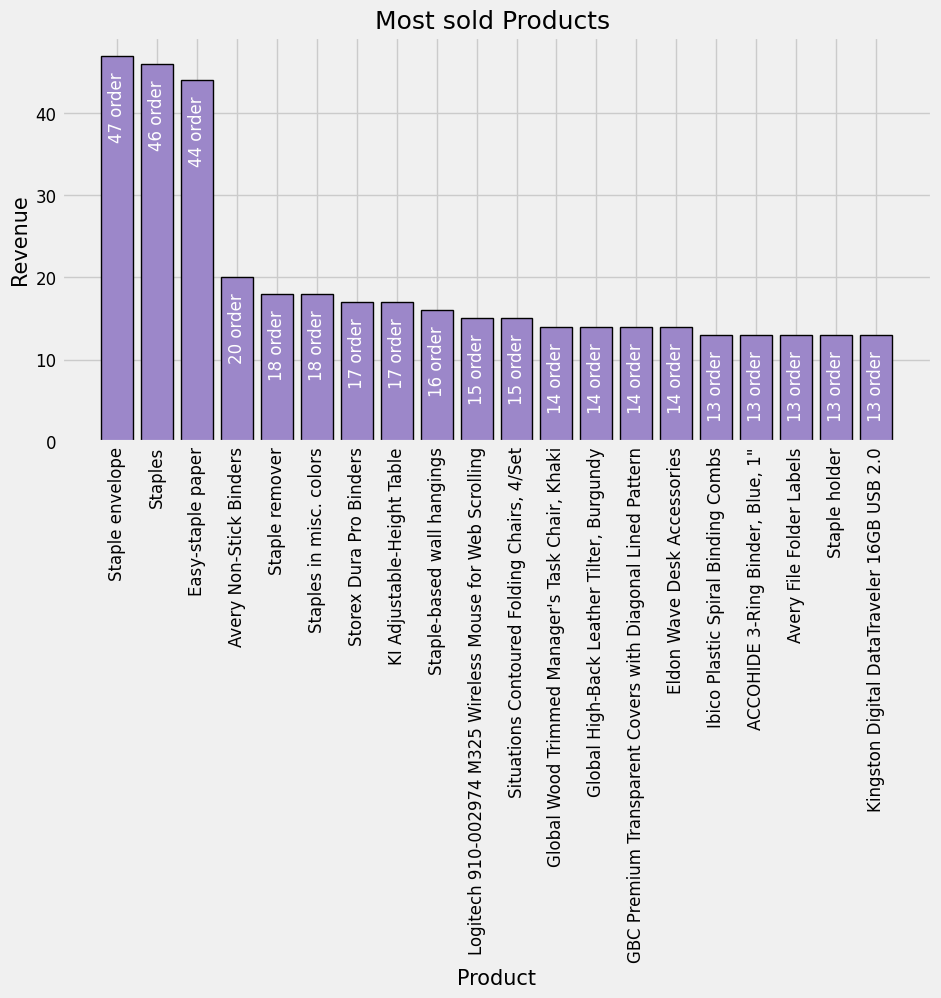

In [62]:
plt.figure(figsize = (10,5))
plt.title("Most sold Products ", fontsize=18)
plt.bar(Top_Product["Product Name"], Top_Product["Sales"],color= '#9c87c9',edgecolor="k", linewidth = 1)
plt.xlabel("Product",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
for k,v in Top_Product["Sales"].items():
    plt.text(k,v-10, str(v)+" order", fontsize=12,rotation=90,color='w', horizontalalignment='center')

This code generates a bar plot illustrating the sales revenue of the top products. It sets the figure size and title accordingly. Each bar represents a product's sales revenue, with the x-axis showing product names and the y-axis displaying revenue. Bars are colored in a shade of purple with black edges for contrast. X-axis labels are rotated for clarity. Each bar is annotated with the number of orders, achieved by iterating through the top products' sales data and adding text annotations to the plot. The code effectively visualizes the sales performance of the top products, providing insights into their contribution to overall revenue.

#Different product category and sub category

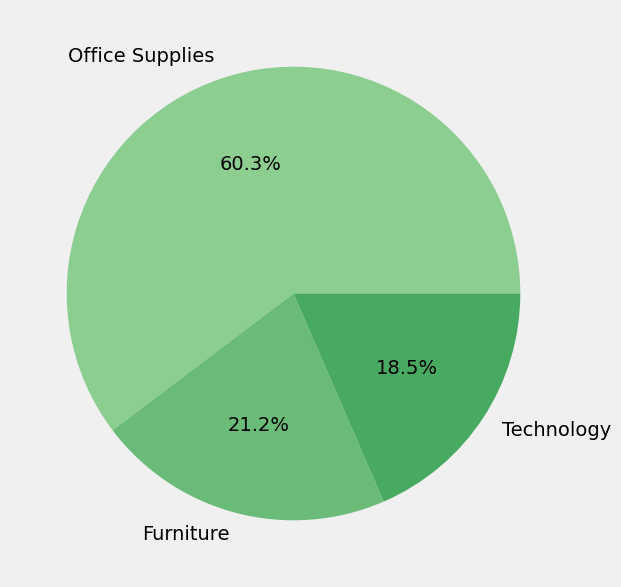

In [63]:
lbl= data['Category'].value_counts().index.to_list()
plt.figure(figsize=(9,7))
plt.pie(data['Category'].value_counts(),labels=lbl, autopct='%1.1f%%', colors=sns.color_palette("Greens_d"))
plt.show()

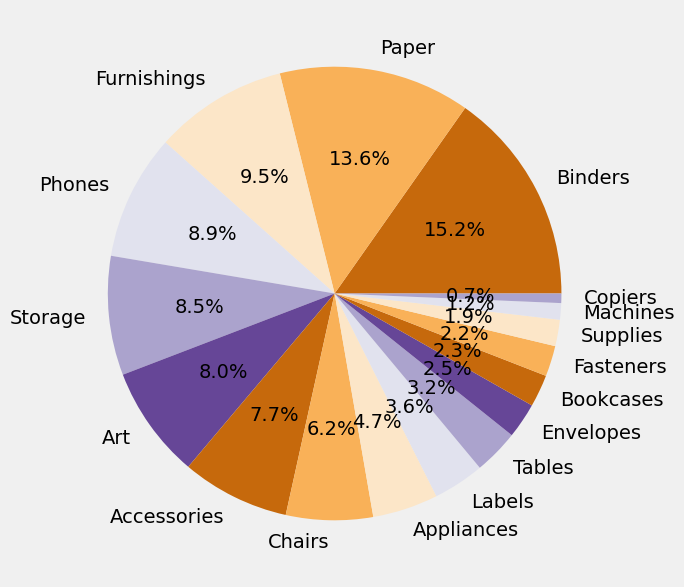

In [64]:
lbl2= data['Sub-Category'].value_counts().index.to_list()
plt.figure(figsize=(9, 7))
plt.pie(data['Sub-Category'].value_counts(),labels=lbl2, autopct='%1.1f%%', colors=sns.color_palette("PuOr"))
plt.show()

#Total Sales by sub category

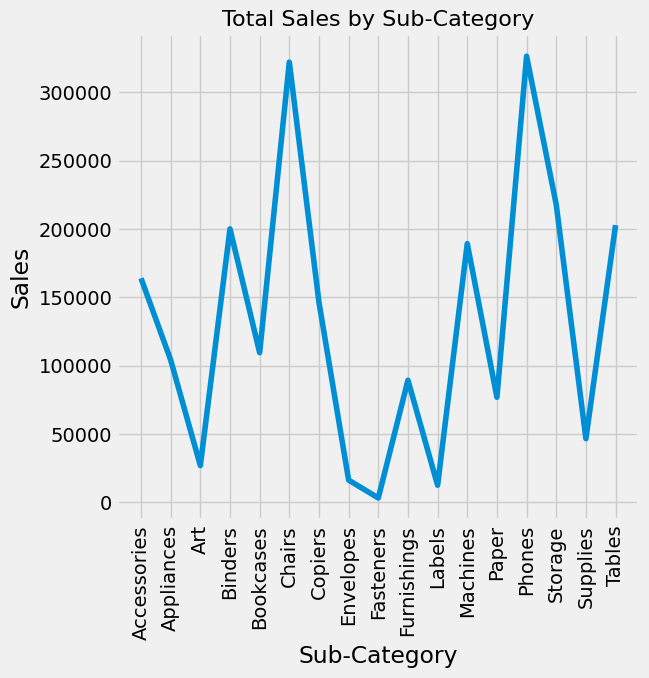

In [73]:
dat = data.groupby('Sub-Category')['Sales'].sum().reset_index()
plt.figure(figsize=(6,6))
sns.lineplot(data=dat, x='Sub-Category', y='Sales')
plt.xticks(rotation=90)
plt.title('Total Sales by ' + 'Sub-Category', fontsize=16)
plt.show()

#Correlation of different features

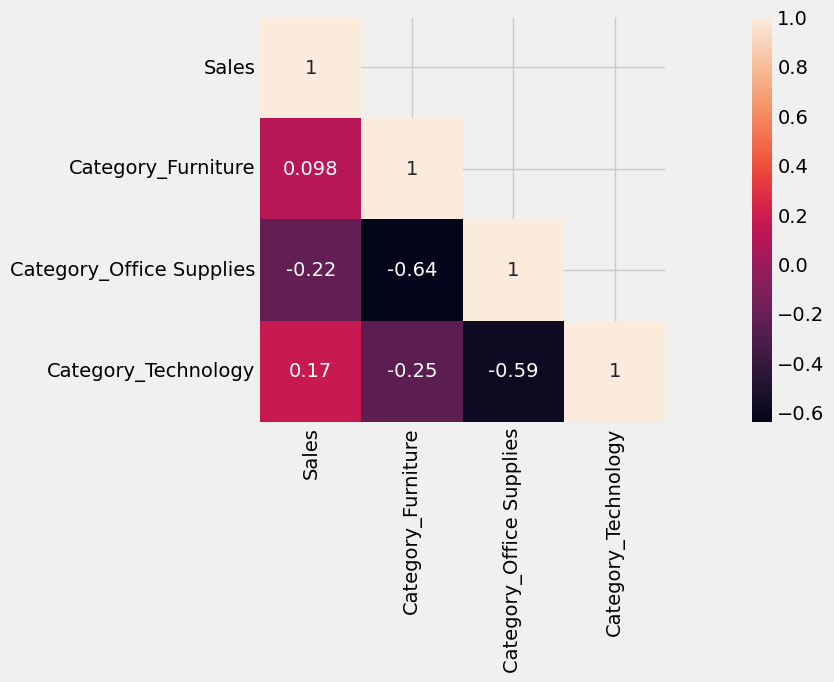

In [47]:
df1 = data[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
mask

fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, square = True,mask=mask, annot = True, cbar = True);

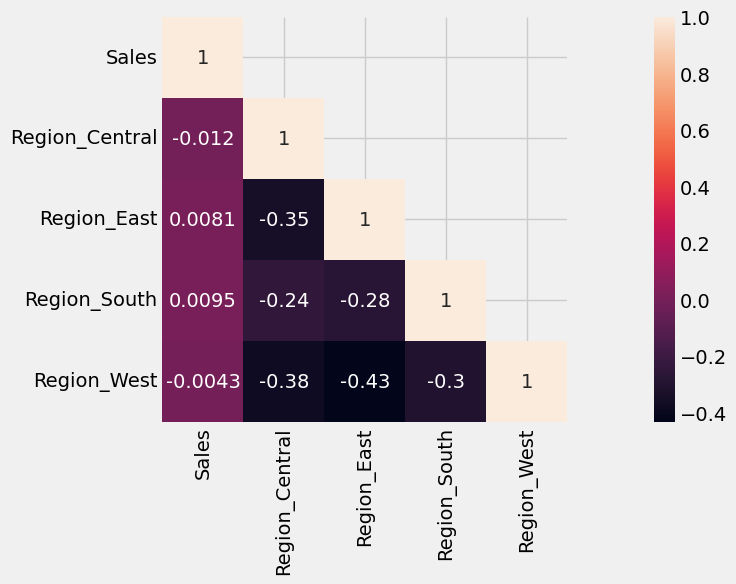

In [48]:
df1 = data[['Region','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
mask

fig = plt.gcf()
fig.set_size_inches(20,5)
sns.heatmap(data = cor_mat, square = True,mask=mask, annot = True, cbar = True);